In [1]:
import matplotlib.pyplot as plt
import glob
import os
import sys
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.utils.model_zoo as model_zoo
import torch
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from torch.autograd import Variable
import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

In [2]:
file_main_path = "" # Please change this path with your current setting!!!
mode = "*_merged.jpg" # Bright
G1_label = 0
G2_label = 0
S_label = 0
Anaphase_label = 1 
Metaphase_label = 2
Prophase_label = 3
Telophase_label = 4
images_number = []

In [3]:
# G1
file_sub_path = "CellCycle/G1/"
path = file_main_path + file_sub_path
G1_image = []
for filename in glob.glob(os.path.join(path, mode)):
    G1_image.append(plt.imread(filename))
G1_image = np.asarray(G1_image)
G1_index = np.full(len(G1_image), G1_label, dtype = int)
print(len(G1_image))
images_number.append(len(G1_image))

14333


In [4]:
# G2
file_sub_path = "CellCycle/G2/"
path = file_main_path + file_sub_path
G2_image = []
for filename in glob.glob(os.path.join(path, mode)):
    G2_image.append(plt.imread(filename))
G2_image = np.asarray(G2_image)
G2_index = np.full(len(G2_image), G2_label, dtype = int)
print(len(G2_image))
images_number.append(len(G2_image))

8601


In [5]:
# S
file_sub_path = "CellCycle/S/"
path = file_main_path + file_sub_path
S_image = []
for filename in glob.glob(os.path.join(path, mode)):
    S_image.append(plt.imread(filename))
S_image = np.asarray(S_image)
S_index = np.full(len(S_image), S_label, dtype = int)
print(len(S_image))
images_number.append(len(S_image))

8616


In [6]:
# Anaphase
file_sub_path = "CellCycle/Anaphase/"
path = file_main_path + file_sub_path
Anaphase_image = []
for filename in glob.glob(os.path.join(path, mode)):
    Anaphase_image.append(plt.imread(filename))
Anaphase_image = np.asarray(Anaphase_image)
Anaphase_index = np.full(len(Anaphase_image), Anaphase_label, dtype = int)
print(len(Anaphase_image))
images_number.append(len(Anaphase_image))

15


In [7]:
# Metaphase
file_sub_path = "CellCycle/Metaphase/"
path = file_main_path + file_sub_path
Metaphase_image = []
for filename in glob.glob(os.path.join(path, mode)):
    Metaphase_image.append(plt.imread(filename))
Metaphase_image = np.asarray(Metaphase_image)
Metaphase_index = np.full(len(Metaphase_image), Metaphase_label, dtype = int)
print(len(Metaphase_image))
images_number.append(len(Metaphase_image))

68


In [8]:
# Prophase
file_sub_path = "CellCycle/Prophase/"
path = file_main_path + file_sub_path
Prophase_image = []
for filename in glob.glob(os.path.join(path, mode)):
    Prophase_image.append(plt.imread(filename))
Prophase_image = np.asarray(Prophase_image)
Prophase_index = np.full(len(Prophase_image), Prophase_label, dtype = int)
print(len(Prophase_image))
images_number.append(len(Prophase_image))

606


In [9]:
# Telophase
file_sub_path = "CellCycle/Telophase/"
path = file_main_path + file_sub_path
Telophase_image = []
for filename in glob.glob(os.path.join(path, mode)):
    Telophase_image.append(plt.imread(filename))
Telophase_image = np.asarray(Telophase_image)
Telophase_index = np.full(len(Telophase_image), Telophase_label, dtype = int)
print(len(Telophase_image))
images_number.append(len(Telophase_image))

27


In [10]:
# combine all the loaded data
images = np.vstack((G1_image, G2_image, S_image, Anaphase_image, Metaphase_image, Prophase_image, Telophase_image))
index = np.concatenate((G1_index, G2_index, S_index, Anaphase_index, Metaphase_index, Prophase_index, Telophase_index))

In [11]:
#images = images[:,np.newaxis,:,:]
images = np.moveaxis(images, -1, 1)
images = images[:,:,1:65,1:65]

In [12]:
images.shape

(32266, 3, 64, 64)

In [13]:
images_number = [(images_number[0] + images_number[1] + images_number[2]), images_number[3], images_number[4], images_number[5],images_number[6]]
images_number

[31550, 15, 68, 606, 27]

In [14]:
# weight calculate
weight = np.array([round((1/i * 100),4) for i in images_number])
weight

array([3.2000e-03, 6.6667e+00, 1.4706e+00, 1.6500e-01, 3.7037e+00])

# ResNet34

In [14]:
import torch
import torch.nn as nn
import torch.utils.model_zoo as model_zoo


__all__ = ['ResNet', 'resnet18', 'resnet34', 'resnet50', 'resnet101','resnet152']


model_urls = {
    'resnet18': 'https://download.pytorch.org/models/resnet18-5c106cde.pth',
    'resnet34': 'https://download.pytorch.org/models/resnet34-333f7ec4.pth',
    'resnet50': 'https://download.pytorch.org/models/resnet50-19c8e357.pth',
    'resnet101': 'https://download.pytorch.org/models/resnet101-5d3b4d8f.pth',
    'resnet152': 'https://download.pytorch.org/models/resnet152-b121ed2d.pth',
}


def conv3x3(in_planes, out_planes, stride=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)

In [15]:
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out

In [16]:
class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride,
                               padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, planes * self.expansion, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out

In [17]:
class ResNet(nn.Module):

    def __init__(self, block, layers, num_classes=5):
        self.inplanes = 64
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3,
                               bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)
        self.avgpool = nn.AvgPool2d(3, stride=1, padding=1)
        self.fc = nn.Linear(2048, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)

        x = self.fc(x)

        return x

In [18]:
def resnet18(pretrained=False, **kwargs):
    """Constructs a ResNet-18 model.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    model = ResNet(BasicBlock, [2, 2, 2, 2], **kwargs)
    if pretrained:
        model.load_state_dict(model_zoo.load_url(model_urls['resnet18']))
    return model
def resnet34(pretrained=False, **kwargs):
    """Constructs a ResNet-34 model.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    model = ResNet(BasicBlock, [3, 4, 6, 3], **kwargs)
    if pretrained:
        model.load_state_dict(model_zoo.load_url(model_urls['resnet34']))
    return model


def resnet50(pretrained=False, **kwargs):
    """Constructs a ResNet-50 model.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    model = ResNet(Bottleneck, [3, 4, 6, 3], **kwargs)
    if pretrained:
        model.load_state_dict(model_zoo.load_url(model_urls['resnet50']))
    return model


def resnet101(pretrained=False, **kwargs):
    """Constructs a ResNet-101 model.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    model = ResNet(Bottleneck, [3, 4, 23, 3], **kwargs)
    if pretrained:
        model.load_state_dict(model_zoo.load_url(model_urls['resnet101']))
    return model


def resnet152(pretrained=False, **kwargs):
    """Constructs a ResNet-152 model.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    model = ResNet(Bottleneck, [3, 8, 36, 3], **kwargs)
    if pretrained:
        model.load_state_dict(model_zoo.load_url(model_urls['resnet152']))
    return model

In [24]:
import torch
EPOCH = 100
BATCH_SIZE = 10
LR = 0.001
resnet = resnet34(pretrained = False)
#cnn = cnn.cuda()
print(resnet)
optimizer = torch.optim.Adam(resnet.parameters(), lr=LR)   # optimize all cnn parameters
# loss function setting
#class_weights = torch.FloatTensor(weight).cuda()
#loss_func = nn.CrossEntropyLoss(weight = class_weights)
loss_func = nn.CrossEntropyLoss()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [25]:
resnet.cuda()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [26]:
idx = np.random.permutation(len(images))
x, y = images[idx], index[idx]

In [27]:
# Split data to training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train = np.expand_dims(y_train,axis = 1)
y_test = np.expand_dims(y_test,axis = 1)

# Change dtype to tensor and float format
X_train_torch = torch.from_numpy(X_train)
X_test_torch = torch.from_numpy(X_test)
y_train_torch = torch.from_numpy(y_train)
y_test_torch = torch.from_numpy(y_test)

X_train_torch = X_train_torch.float()
y_train_torch = y_train_torch.long()
X_test_torch = X_test_torch.float()
y_test_torch = y_test_torch.long()

In [28]:
# start training
loss_list = []
for epoch in range(EPOCH):
    step_length = len(range(0, X_train_torch.size(0), BATCH_SIZE))
    print("epoch: ", str(epoch+1))
    
    losses = []
    for step, beg_i in enumerate(range(0, X_train_torch.size(0), BATCH_SIZE)):
        
        processing = str(round(((step)/ step_length * 100),2)) + "% " +"\r"
        sys.stdout.write(processing)
        sys.stdout.flush()
        
        x_batch = X_train_torch[beg_i:beg_i + BATCH_SIZE, :].cuda()
        y_batch = y_train_torch[beg_i:beg_i + BATCH_SIZE, :].cuda()
        
        x_batch = Variable(x_batch)
        y_batch = Variable(y_batch)

        output = resnet(x_batch)              # cnn output
        loss = loss_func(output, y_batch.squeeze())   # cross entropy loss
        losses.append(float(loss.cpu().data.numpy()))

        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients
    loss_list.append(sum(losses))

epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  6


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



epoch:  12
epoch:  13
epoch:  14
epoch:  15
epoch:  16
epoch:  17
epoch:  18
epoch:  20
epoch:  21
epoch:  22
epoch:  23
epoch:  24
epoch:  25
epoch:  26
epoch:  27
epoch:  28
epoch:  29
epoch:  30
epoch:  31
epoch:  32
epoch:  33
epoch:  34
epoch:  35
epoch:  36
epoch:  37
epoch:  38
epoch:  39
epoch:  40
epoch:  41
epoch:  42
epoch:  43
epoch:  44
epoch:  45
epoch:  46
epoch:  47
epoch:  48
epoch:  49
epoch:  50
epoch:  51
epoch:  52
epoch:  53
epoch:  54
epoch:  55
epoch:  56
epoch:  57
epoch:  58
epoch:  59
epoch:  60
epoch:  61
epoch:  62
epoch:  63
epoch:  64
epoch:  65
epoch:  66
epoch:  67
epoch:  68
epoch:  69
epoch:  70
epoch:  71
epoch:  72
epoch:  73
epoch:  74
epoch:  75
epoch:  76
epoch:  77
epoch:  78
epoch:  79
epoch:  80
epoch:  81
epoch:  82
epoch:  83
epoch:  84
epoch:  85
epoch:  86
epoch:  87
epoch:  88
epoch:  89
epoch:  90
epoch:  91
epoch:  92
epoch:  93
epoch:  94
epoch:  95
epoch:  96
epoch:  97
epoch:  98
epoch:  99
epoch:  100


In [29]:
torch.save(resnet.state_dict(), "Resnet_5_class_ver6.pkl")

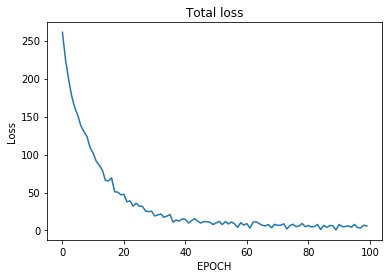

In [30]:
# Loss changing during training
plt.plot(range(0,EPOCH), loss_list)
plt.xlabel("EPOCH")
plt.ylabel("Loss")
plt.title("Total loss")
plt.show()

In [31]:
resnet.cpu()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [32]:
# predict by part
part = 200
accuracy_sum = 0 
prediction_list = []
for i in range(part):
    print("finish ", (i+1), " / ", part)
    start = int(i / part * len(X_test_torch))
    end = int((i+1) / part * len(X_test_torch))
    X_test_torch_part = X_test_torch[start:end]
    y_test_torch_part = y_test_torch[start:end]
    with torch.no_grad():
        test_output = resnet(X_test_torch_part)
        pred_y = torch.max(test_output, 1)[1].data.squeeze()
        prediction_list.append(pred_y.numpy())
        accuracy = sum(pred_y == y_test_torch_part.squeeze()).item()
        accuracy_sum += accuracy
print("accuracy: ", accuracy_sum/len(X_test_torch))

finish  1  /  200
finish  2  /  200
finish  3  /  200
finish  4  /  200
finish  5  /  200
finish  6  /  200
finish  7  /  200
finish  8  /  200
finish  9  /  200
finish  10  /  200
finish  11  /  200
finish  12  /  200
finish  13  /  200
finish  14  /  200
finish  15  /  200
finish  16  /  200
finish  17  /  200
finish  18  /  200
finish  19  /  200
finish  20  /  200
finish  21  /  200
finish  22  /  200
finish  23  /  200
finish  24  /  200
finish  25  /  200
finish  26  /  200
finish  27  /  200
finish  28  /  200
finish  29  /  200
finish  30  /  200
finish  31  /  200
finish  32  /  200
finish  33  /  200
finish  34  /  200
finish  35  /  200
finish  36  /  200
finish  37  /  200
finish  38  /  200
finish  39  /  200
finish  40  /  200
finish  41  /  200
finish  42  /  200
finish  43  /  200
finish  44  /  200
finish  45  /  200
finish  46  /  200
finish  47  /  200
finish  48  /  200
finish  49  /  200
finish  50  /  200
finish  51  /  200
finish  52  /  200
finish  53  /  200
fi

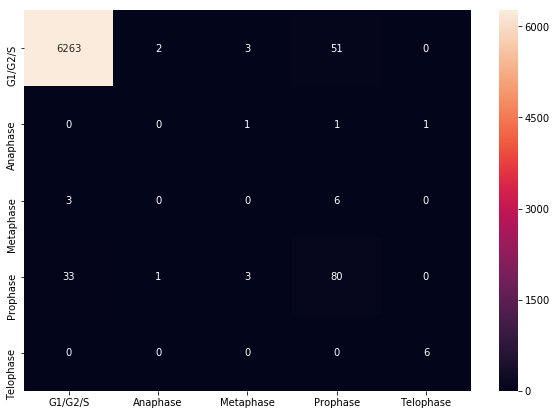

In [33]:
#confusion table
prediction_list_numpy = np.array([num for elem in prediction_list for num in elem])
y_test_numpy = np.asarray(y_test_torch).flatten()
confusion = confusion_matrix(prediction_list_numpy, y_test_numpy)

label_list = ["G1/G2/S", "Anaphase","Metaphase", "Prophase","Telophase"]
# Confusion table without normalization
df_cm = pd.DataFrame(confusion, index = [i for i in label_list],
                  columns = [i for i in label_list])
plt.figure(figsize = (10,7))
#plt.title("4-fold Crossvalidation(CV"+str(CV+1)+"): Confusion matrix", size = 15)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}, fmt='g')
plt.show()

In [ ]:
#2 weight:0.9747
#3 weight/ratio 0.1: 0.9832661915091416
#4 weight/all/80epoch: 0.9874480877704085
#5 NO weight/0.2/80epoch: 0.986674930275798